In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

The first step is to get rid of all null values.

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
df.yr_renovated = df.yr_renovated.fillna(df.yr_renovated.mean()) 

In [14]:
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront = df.waterfront.astype(float)

In [15]:
df.sqft_basement = df.sqft_basement.replace('?', 0)
df.sqft_basement = df.sqft_basement.astype(float)

In [16]:
df.view = df.view.fillna(0.0)

The following command makes sure there are no null values: 

In [17]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Clear. Now, it's time to make sure everything is the right data type. 

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

From what we can see above, we need floors, waterfront, view, yr_renovated, lat, and long should be integers and not floats. 

In [18]:
df.floors = df.floors.astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.lat = df.lat.astype(int)
df.long = df.long.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null int64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null int64
long             21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 3.5+ MB


In [79]:
#corr = df.corr()
#sns.heatmap(corr)

sns.heatmap(df)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Now the data is clean, it is time to check for multicollinearity between values. This means the likliehood that dependent variable perdicts another dependent variable (as opposed to the independent variable). To do that, a heat map will be used. Very light colors indicates high multicollinearity 

TypeError: isinstance() arg 2 must be a type or tuple of types


From this heat graph, it's clear that not all of the features will be used in the model. bathrooms and bedrooms and sqft_living is a good example, as is Floors is also very red.

It also appears that something is up with lat - from checking the unique values, it is clear that all of the houses in this county have the same latitute, which makes sense. It will be removed from the model. Same with id. 



Now, it's time explore the data - histograms will be made of each of the variables. 

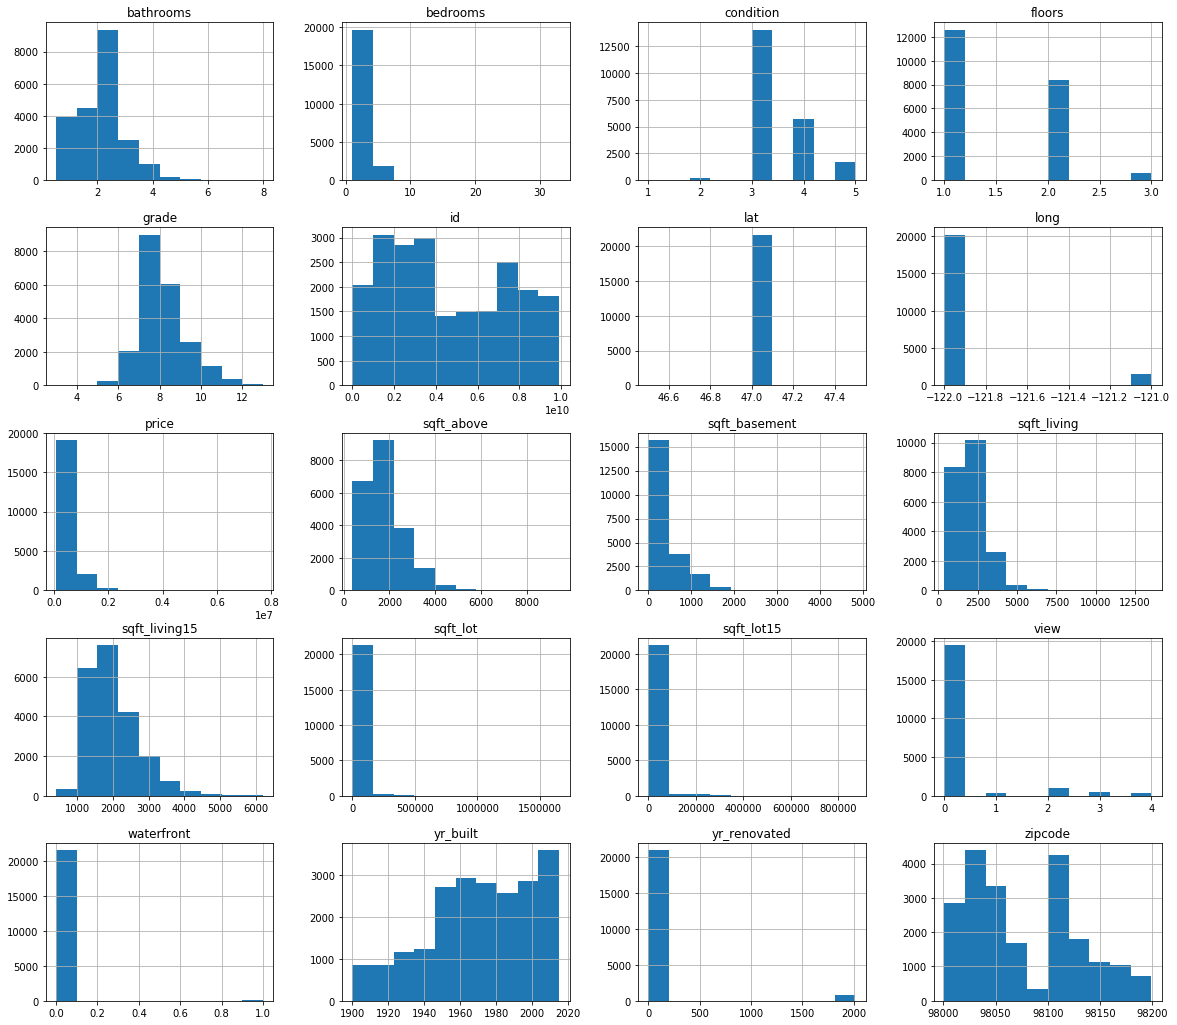

In [22]:
df.hist(figsize = (20,18));

From the histograms, it's clear that transformations need to be made, as well getting rid of outliers. "Bedrooms" is a clear example of outliers, "sqft_lot" is a good example of data that needs to be log transformed, and categorical variables such as "view" and "condition" will be min/maxed. 

Outliers:


In [23]:
df = df[df.bedrooms != 33]
df = df[df.bedrooms != 11]
df = df[df.bedrooms != 10]
df = df[df.bedrooms != 9]
df = df[df.bathrooms != 8]
df = df[df.bathrooms != 7.75]
df = df[df.bathrooms != 7.25]


Log Transformations:

In [24]:
df.sqft_living = np.log(df.sqft_living)
df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_above = np.log(df.sqft_above)
#kc_features.sqft_basement = np.log(kc_features.sqft_basement)
df.price = np.log(df.price)



Min Max Scaling: 

In [25]:
df.condition = (df.condition-min(df.condition))/(max(df.condition)-min(df.condition))	
df.view = (df.view-min(df.view))/(max(df.view)-min(df.view))	

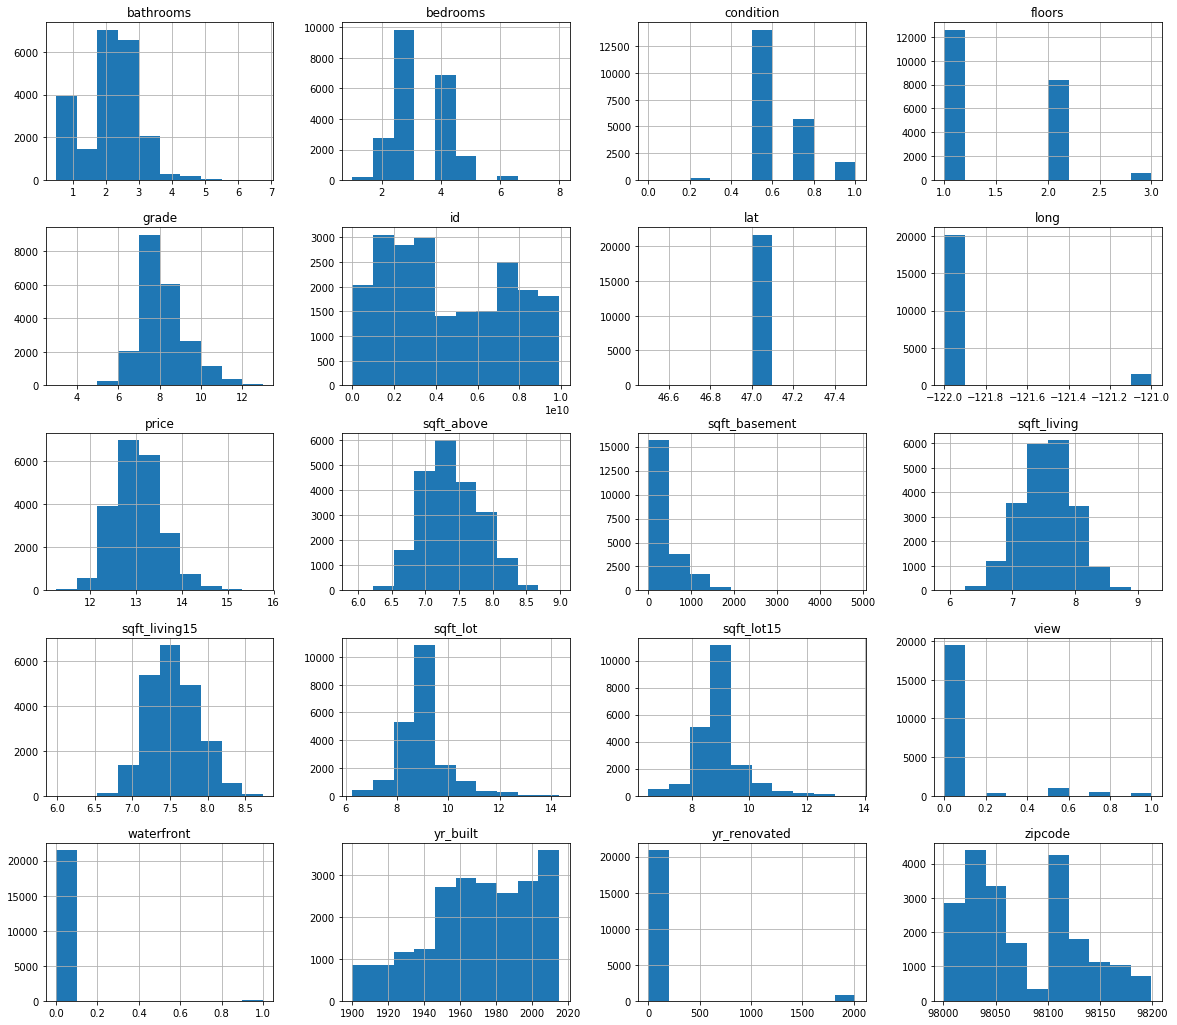

In [26]:
df.hist(figsize = (20,18));

The data looks good, with the exception of waterfront, yr_renovated, yr_built and zipcode. These need their own type of transformation based on the fact that they are not numerically related. 

For the yr_built, we will subtract the year from 2019:

In [27]:
df["Age_of_house"] = 2019 - df["yr_built"]
df["Age_of_renovations"] = 2019 - df["yr_renovated"]

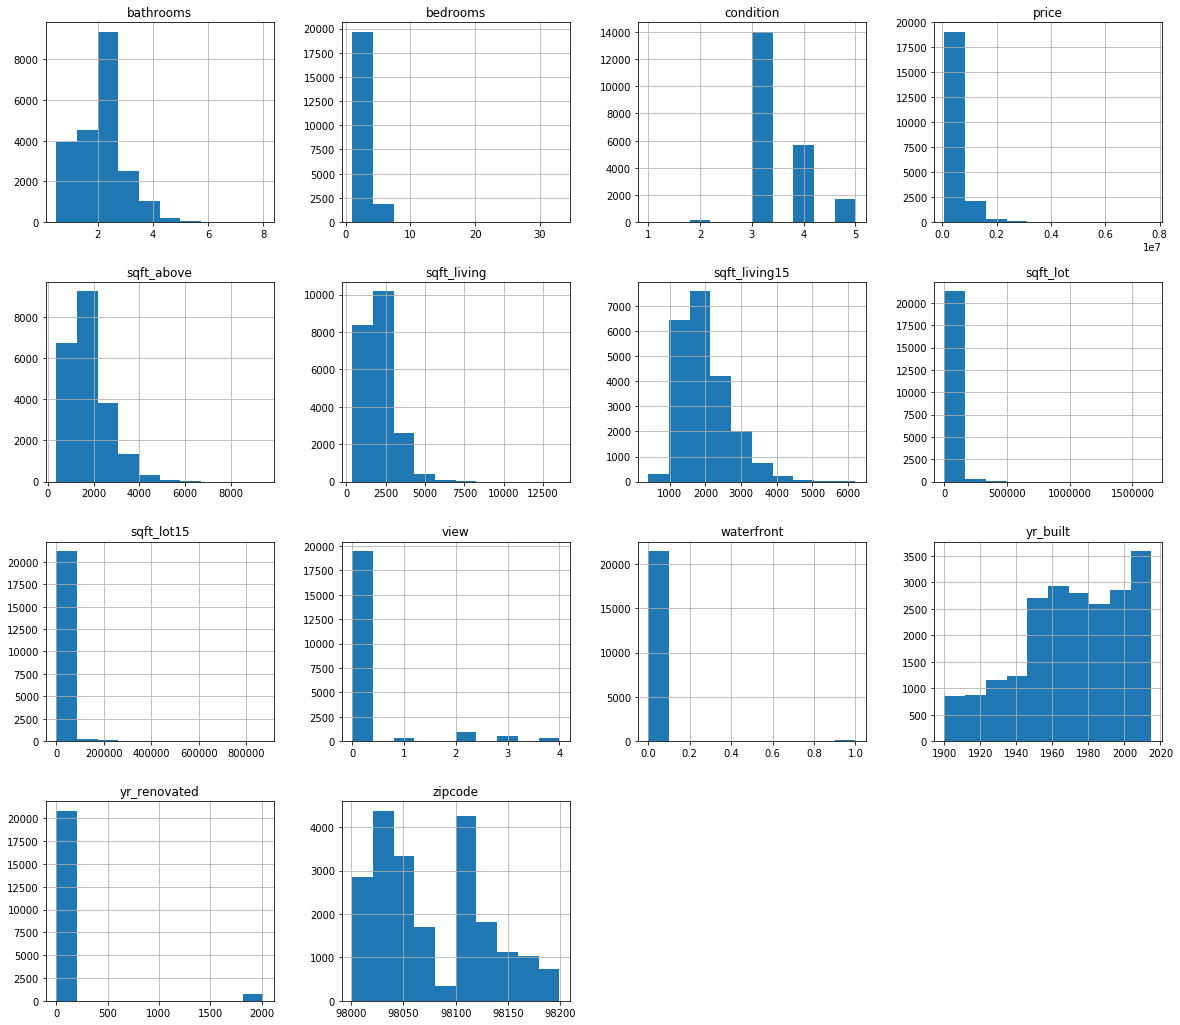

In [28]:
kc_features.hist(figsize = (20,18));

Next in transforming, is changing the variable type. "Waterfront" is a yes/no, so that should be a category. 

In [29]:
df.waterfront = df.waterfront.astype('category')

In [30]:
#bins = ['1900-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020']

#kc_features.yr_built = pd.cut(kc_features['yr_built'], 6, labels=bins)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 0 to 21596
Data columns (total 23 columns):
id                    21583 non-null int64
date                  21583 non-null object
price                 21583 non-null float64
bedrooms              21583 non-null int64
bathrooms             21583 non-null float64
sqft_living           21583 non-null float64
sqft_lot              21583 non-null float64
floors                21583 non-null int64
waterfront            21583 non-null category
view                  21583 non-null float64
condition             21583 non-null float64
grade                 21583 non-null int64
sqft_above            21583 non-null float64
sqft_basement         21583 non-null float64
yr_built              21583 non-null int64
yr_renovated          21583 non-null int64
zipcode               21583 non-null int64
lat                   21583 non-null int64
long                  21583 non-null int64
sqft_living15         21583 non-null float64
sqft_lot1

Now, it's time to run the model. From the above testing, it's apparent that ID, yr_renovated, yr_built, lat and long need to be removed. yr_renovated and yr_built are replaced with their "age" counterparts. 

In [44]:
df = df.drop(["yr_renovated", "yr_built", "id", "lat", "long"], axis=1)

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [46]:
data_fin = pd.concat([df.price, df.sqft_living, df.sqft_living15, df.sqft_above, df.sqft_lot, df.sqft_lot15, df.condition, df.view, df.waterfront, df.bedrooms, df.Age_of_house, df.Age_of_renovations], axis=1)

In [47]:
formula = "price ~ sqft_living+sqft_living15 + sqft_lot+ sqft_lot15+sqft_above+bedrooms+Age_of_house+Age_of_renovations+condition+view+waterfront + sqft_lot+bathrooms"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2523.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:32:20   Log-Likelihood:                -7285.4
No. Observations:               21583   AIC:                         1.460e+04
Df Residuals:                   21570   BIC:                         1.470e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.3207      0.074     72.055      0.000       5.176       5.465
waterfront[T.1]        0.3935      0.031     12.864      0.000       0.334       0.453
sqft_living            0.5212      0.014     36.086      0.000       0.493       0.550
sqft_living15          0.4376      0.011     38.526      0.000       0.415       0.460
sqft_lot              -0.0442      0.007     -6.689      0.000      -0.057      -0.031
sqft_lot15            -0.0533      0.007     -7.288      0.000      -0.068      -0.039
sqft_above             0.1457      0.012     12.414      0.000       0.123       0.169
bedrooms              -0.0792      0.003    -22.983      0.000      -0.086      -0.072
Age_of_house           0.0046      0.000     42.980      0.000       0.004       0.005
Age_of_renovations  -2.48e-05   6.74e-06     -3.682      0.000    -3.8e-05   -1.16e-05
condition              0.1394      0.016      8.895      0.000       0.109       0.170
view                   0.2888      0.014     20.795      0.000       0.262       0.316
bathrooms              0.1318      0.005     24.817      0.000       0.121       0.142
==============================================================================
Omnibus:                        7.014   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.029
Skew:                          -0.044   Prob(JB):                       0.0298
Kurtosis:                       2.990   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All p-values are below .05, which means this data is significant. The R Squared value is .57, which on a scale from 0 (the model does not fit the data) to 1 (the model exactly fits the data), this falls somewhere in the middle. 

In [48]:
data_fin = pd.concat([df.price, df.sqft_living, df.sqft_living15, df.sqft_above, df.sqft_lot, df.sqft_lot15, df.condition, df.view, df.waterfront, df.bedrooms, df.Age_of_house, df.bathrooms], axis=1)

In [49]:
formula = "price ~ sqft_living+sqft_living15 + sqft_lot+ sqft_lot15 +sqft_above+bathrooms+Age_of_house+condition+view+waterfront + sqft_lot"
model = ols(formula= formula, data = data_fin).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2899.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:32:35   Log-Likelihood:                -7557.3
No. Observations:               21583   AIC:                         1.514e+04
Df Residuals:                   21572   BIC:                         1.522e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7117      0.071     80.788      0.000       5.573       5.850
waterfront[T.1]     0.4233      0.031     13.684      0.000       0.363       0.484
sqft_living         0.4105      0.014     29.763      0.000       0.383       0.438
sqft_living15       0.4550      0.011     39.713      0.000       0.433       0.477
sqft_lot           -0.0470      0.007     -7.030      0.000      -0.060      -0.034
sqft_lot15         -0.0509      0.007     -6.877      0.000      -0.065      -0.036
sqft_above          0.1523      0.012     12.830      0.000       0.129       0.176
bathrooms           0.1188      0.005     22.452      0.000       0.108       0.129
Age_of_house        0.0045      0.000     43.358      0.000       0.004       0.005
condition           0.1158      0.016      7.397      0.000       0.085       0.147
view                0.3201      0.014     22.868      0.000       0.293       0.348
==============================================================================
Omnibus:                        5.383   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.388
Skew:                          -0.034   Prob(JB):                       0.0676
Kurtosis:                       2.962   Cond. No.                     1.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we will run recursive feature elimination to examine each varible's impact on the price of housing. We are looking for significant p values (below .05), and coefficents that are greater than .1. 

In [50]:
import statsmodels.formula.api as smf

In [51]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("kc_features: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


kc_features: price~bedrooms
------------------------------
['bedrooms', 0.12291545971530826, 12.352995830294015, 0.20620939424615187, 0.0]
kc_features: price~bathrooms
------------------------------
['bathrooms', 0.3024213981791507, 12.248007663721758, 0.3782185589253012, 0.0]
kc_features: price~sqft_living
------------------------------
['sqft_living', 0.4541566082368288, 6.731407955665227, 0.8365659492279289, 0.0]
kc_features: price~sqft_lot
------------------------------
['sqft_lot', 0.01889986818355216, 12.327162878229608, 0.08014373063493363, 1.507865934977836e-91]
kc_features: price~floors
------------------------------
['floors', 0.08156281857574055, 12.654077170142752, 0.27222643552710135, 0.0]
kc_features: price~view
------------------------------
['view', 0.11765175090591407, 12.992672902262415, 0.9445331913024394, 0.0]
kc_features: price~condition
------------------------------
['condition', 0.0015318185041158783, 12.971403993253125, 0.12652037361574742, 8.831861680002768e-0

In [52]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.122915,12.353,0.206209,0
2,bathrooms,0.302421,12.248,0.378219,0
3,sqft_living,0.454157,6.73141,0.836566,0
4,sqft_lot,0.0188999,12.3272,0.0801437,1.50787e-91
5,floors,0.0815628,12.6541,0.272226,0
6,view,0.117652,12.9927,0.944533,0
7,condition,0.00153182,12.9714,0.12652,8.83186e-09
8,grade,0.494351,10.6319,0.31548,0
9,sqft_above,0.342229,7.71654,0.720933,0


The standards for significance and model fit are an R-squared value <0.2 and P Value greater than .05. These are dropped, although it is important to note that all P Values are within the acceptable range. 

In [69]:
df2 = df.drop(["condition", "sqft_lot", "sqft_basement", "sqft_lot15", "Age_of_house", "Age_of_renovations", "zipcode", "floors", "view", "bedrooms"], axis=1)

In [70]:
col_names = df2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("df2: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df2).fit()
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


df2: price~bathrooms
------------------------------
['bathrooms', 0.3024213981791507, 12.248007663721758, 0.3782185589253012, 0.0]
df2: price~sqft_living
------------------------------
['sqft_living', 0.4541566082368288, 6.731407955665227, 0.8365659492279289, 0.0]
df2: price~grade
------------------------------
['grade', 0.4943514049387224, 10.631921827812178, 0.3154804254646297, 0.0]
df2: price~sqft_above
------------------------------
['sqft_above', 0.3422290329491601, 7.716541122452437, 0.7209329633118208, 0.0]
df2: price~sqft_living15
------------------------------
['sqft_living15', 0.36816888750395416, 5.700447420684712, 0.9745093459159992, 0.0]


In [71]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bathrooms,0.302421,12.248,0.378219,0
2,sqft_living,0.454157,6.73141,0.836566,0
3,grade,0.494351,10.6319,0.31548,0
4,sqft_above,0.342229,7.71654,0.720933,0
5,sqft_living15,0.368169,5.70045,0.974509,0


In [73]:
formula = "price ~ sqft_living+bathrooms+grade+waterfront+sqft_living15+sqft_above"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     4778.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:39:06   Log-Likelihood:                -7626.5
No. Observations:               21583   AIC:                         1.527e+04
Df Residuals:                   21576   BIC:                         1.532e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9516      0.073    108.344      0.000       7.808       8.095
waterfront[T.1]     0.6636      0.029     23.089      0.000       0.607       0.720
sqft_living         0.5133      0.013     39.018      0.000       0.488       0.539
bathrooms          -0.0046      0.005     -0.932      0.351      -0.014       0.005
grade               0.2046      0.003     61.518      0.000       0.198       0.211
sqft_living15       0.1962      0.011     17.185      0.000       0.174       0.219
sqft_above         -0.2462      0.012    -21.268      0.000      -0.269      -0.223
==============================================================================
Omnibus:                       43.458   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.856
Skew:                           0.089   Prob(JB):                     8.15e-10
Kurtosis:                       2.877   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When Waterfront was added, it bathrooms becomes insignificant, and we need to drop that variable. 

In [75]:
formula = "price ~ sqft_living+grade+waterfront+sqft_living15+sqft_above"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     5734.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:40:20   Log-Likelihood:                -7626.9
No. Observations:               21583   AIC:                         1.527e+04
Df Residuals:                   21577   BIC:                         1.531e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.9820      0.066    121.378      0.000       7.853       8.111
waterfront[T.1]     0.6636      0.029     23.089      0.000       0.607       0.720
sqft_living         0.5086      0.012     41.980      0.000       0.485       0.532
grade               0.2039      0.003     62.846      0.000       0.198       0.210
sqft_living15       0.1970      0.011     17.297      0.000       0.175       0.219
sqft_above         -0.2468      0.012    -21.353      0.000      -0.269      -0.224
==============================================================================
Omnibus:                       44.568   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.906
Skew:                           0.090   Prob(JB):                     4.82e-10
Kurtosis:                       2.875   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similarily, the sqft_above varible is also suspect due to the coefficient. 

In [77]:
formula = "price ~ sqft_living+grade+waterfront+sqft_living15"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6907.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:41:28   Log-Likelihood:                -7852.6
No. Observations:               21583   AIC:                         1.572e+04
Df Residuals:                   21578   BIC:                         1.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.7382      0.065    118.245      0.000       7.610       7.866
waterfront[T.1]     0.6837      0.029     23.552      0.000       0.627       0.741
sqft_living         0.3470      0.010     36.297      0.000       0.328       0.366
grade               0.1862      0.003     58.745      0.000       0.180       0.192
sqft_living15       0.1670      0.011     14.628      0.000       0.145       0.189
==============================================================================
Omnibus:                       91.343   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.449
Skew:                           0.093   Prob(JB):                     9.22e-18
Kurtosis:                       2.771   Cond. No.                         368.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final model - waterfront, sqft_living, grade, and sqft_living15 all have an impact on price on King County housing. 